<h1>Содержание<span class="tocSkip"></span></h1>
<h3></h3>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров" data-toc-modified-id="Изучение-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Работа-с-редкими-и-выбивающимися-значениями" data-toc-modified-id="Работа-с-редкими-и-выбивающимися-значениями-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Работа с редкими и выбивающимися значениями</a></span></li><li><span><a href="#Определение-факторов,-влияющих-на-стоимость-квартиры" data-toc-modified-id="Определение-факторов,-влияющих-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Определение факторов, влияющих на стоимость квартиры</a></span></li><li><span><a href="#Сравнение-средней-цены-квадратного-метра-в-топ-10-городов" data-toc-modified-id="Сравнение-средней-цены-квадратного-метра-в-топ-10-городов-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Сравнение средней цены квадратного метра в топ-10 городов</a></span></li><li><span><a href="#Определение-границы-центральной-зоны" data-toc-modified-id="Определение-границы-центральной-зоны-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Определение границы центральной зоны</a></span></li><li><span><a href="#Анализ-сегмента-квартир-в-центре,-сравнение-с-квартирами-по-всему-городу" data-toc-modified-id="Анализ-сегмента-квартир-в-центре,-сравнение-с-квартирами-по-всему-городу-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ сегмента квартир в центре, сравнение с квартирами по всему городу</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# импорт библиотеки pandas
# импорт библиотеки matplotlib

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#чтение файла с данными и сохранение в df

try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv('C:/Users/solod/Downloads/real_estate_data.csv', sep = '\t')    

In [3]:
# получение первых 15 строк таблицы df

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# получение общей информации о данных в таблице df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# получение информации об описательных статиcтических данных
# в таблице df

df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Итак, в таблице 22 столбца. У столбцов наблюдается 4 типа данных: `bool`, `float64`, `int64`, `object`.

Согласно документации к данным:

* `total_images` - число фотографий квартиры в объявлении;
* `last_price` - цена на момент снятия с публикации;
* `total_area` - площадь квартиры в квадратных метрах (м²);
* `first_day_exposition` - дата публикации;
* `rooms` - число комнат;
* `ceiling_height` - высота потолков (м);
* `floors_total` - всего этажей в доме;
* `living_area` -  жилая площадь в квадратных метрах (м²);
* `floor` - этаж;
* `is_apartment` - апартаменты (булев тип);
* `studio` - квартира-студия (булев тип);
* `open_plan` - свободная планировка (булев тип);
* `kitchen_area` - площадь кухни в квадратных метрах (м²);
* `balcony` - число балконов;
* `locality_name` - название населённого пункта;
* `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м);
* `cityCenters_nearest` - расстояние до центра города (м);   
* `parks_around3000` - число парков в радиусе 3 км;     
* `parks_nearest` - расстояние до ближайшего парка (м);         
* `ponds_around3000` - число водоёмов в радиусе 3 км;     
* `ponds_nearest` - расстояние до ближайшего водоёма (м);           
* `days_exposition` - сколько дней было размещено объявление (от публикации до снятия).

В названиях столбцов отсутствует нарушение стиля.

Однако, в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cituCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и `days_exposition` присутствует меньшее количество значений, чем  в остальных столбцах, следовательно, в данных есть пропущенные значения.

В столбце `last_price`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` и `days_exposition` необходимо перевести значения к типу `int` (целые числа) для удобства просмотра и дальнейшего анализа даннных. 
В столбце `first_day_exposition` необходимо изменить тип данных на `datetime`, но оставить только дату, так как время не указано.
В столбце `is_apartment` необходимо изменить тип данных с `object` на `bool`, так как там представлены логические значения (True, False). 

### Вывод

В каждом столбце представлена информация о продаваемой квартире, а именно: площадь, число комнат, высота потолков, сколько этажей в доме, жилая площадь, этаж, относится ли к апартаментам, к квартире-студии, свободная ли планировка, площадь кухни, число балконов, название населённого пункта, расстояние до аэропорта, центра, парка, водоёма и число парков, водоёмов. 
А также, представлена информация по объявлениям, которые были созданы для продажи квартиры: дата публикации, количество фотографий, цена квартиры на момент снятия с публикации, сколько дней было размещено объявление.

Для более точного и правильного анализа данных необходимо:
* заменить по возможности пропущенные значения в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cituCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и `days_exposition`;
* перевести значения к типу `int` в столбцах `last_price`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` и `days_exposition`;
* изменить в столбце `first_day_exposition` тип данных на `datetime`, но оставить только дату, так как время не указано.
* изменить тип данных в столбце `is_apartment` на `bool`. 

## Предобработка данных

In [6]:
# подсчёт пропущенных значений

df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Возможно, что пропуски в данных появились по причине того, что информация по квартирам была собрана двумя способами: данные поступили непосредственно от людей и автоматическим способом, то есть на основе картографических данных. Поэтому, при объединении информации из двух разных видов данных, возникли пропуски, как несоответствие значений или их частичная потеря.

Также, стоит отметить отдельно по некоторым столбцам возможные причины появления пропусков. 

Например, в столбце `days_exposition` пропуски могли возникнуть по причине того, что объявление до сих пор не снято с публикации и не совсем известно количество дней, поэтому пользователь не указал никакой информации. 

В столбцах `parks_around3000` и `ponds_around3000` пропуски могли появиться по причине того, что по картографическим данным было выявлено отсутствие близости парков и водоёмов к выбранным объектам недвижимости.

В столбце `balcony` пропуски могут означать отсутствие балкона, поэтому пользователь не указал никакой информации.

В столбце `is_apartment` пользователь также мог не указать никакой информации, так как квартира не относится к типу апартаментов.



Далее приступим к отдельному просмотру столбцов для изменения типов данных, замене пропусков, удалению дубликатов.

In [7]:
# перевод значений столбца 'last_price' в тип данных 'int'

df['last_price'] = df['last_price'].astype('int')

In [8]:
# подсчёт уникальных значений столбца 'last_price'

df['last_price'].value_counts()

4500000     342
3500000     291
4000000     260
4300000     260
4200000     259
           ... 
1320000       1
19150000      1
6649000       1
10296437      1
11615600      1
Name: last_price, Length: 2978, dtype: int64

In [9]:
# перевод значений столбца 'first_day_exposition' в тип данных 'datetime'
# без указания времени

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [10]:
# просмотр первых пяти значений столбца 'first_day_exposition'

df['first_day_exposition'].head() 

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [11]:
# получение информациии об описательных статистических данных
# в столбце 'ceiling_height'

df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В столбце `ceiling_height` мы видим, как аномально большие значения, так и аномально маленькие значения. Самая максимальная высота потолков в современных застройках  не превышает 3,2 метра, в старых домах 4 - 4,5 метра, а оптимальной высотой полотков считается 2,8 метров. Вернёмся к анализу данного столбца в пункте исследовательский анализ данных для более полного рассмотрения, построения гистограммы и возможной дальнейшей замены пропущенных значений.

In [12]:
# получение уникальных значений в столбце 'floors_total'

df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

Как мы видим в столбце `floors_total` больше представлены `пятиэтажные` и `девятиэтажные` дома.

In [13]:
# получение среза по пропущенным значениям
# в столбце 'floors_total'

df.query('floors_total.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Так как пропущенных строк в столбце `floors_total` всего 86, то можно заполнить пропущенные значения в зависимости от столбца `floor` по следующему принципу:

- если значение в столбце `floor` от `1-5`, то в столбце `floors_total` будет `пятиэтажный` дом;
- если значение в столбце `floor` от `6-9`, то в столбце `floors_total` будет `девятиэтажный` дом;
- если значение в столбце `floor` больше `9`, то в столбце `floors_total` это будет `floor-1`.

In [14]:
# заполнение пропущенных значений в столбце 'floors_total'

df.loc[df.query('floors_total.isna() and 5 >= floor >= 1').index, 'floors_total'] = 5
df.loc[df.query('floors_total.isna() and 9 >= floor >= 6').index, 'floors_total'] = 9
df.loc[df.query('floors_total.isna() and floor > 9').index, 'floors_total'] = df['floor'] - 1 

In [15]:
# подсчёт пропущенных значений в столбце 'floors_total'

print('Количество пропущенных значений:', df['floors_total'].isna().sum())

Количество пропущенных значений: 0


In [16]:
# перевод значений столбца 'floors_total' в тип данных 'int'
# и просмотр первых пяти уникальных значений

df['floors_total'] = df['floors_total'].astype('int')
df['floors_total'].value_counts().head()

5     5811
9     3790
16    1377
12    1365
4     1200
Name: floors_total, dtype: int64

In [17]:
# # получение информациии об описательных статистических данных
# в столбце 'liviing_area'

df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [18]:
# # получение информациии об описательных статистических данных
# в столбце 'kitchen_area'

df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Для начала найдём коэффициент жилой площади ко всей площади и также коэффициент площади кухни ко всей площади квартиры.

Далее заменим пропущенные значения в столбцах `living_area` и `kitchen_area` по следующему принципу: умножим полученный коэффициент на значения столбца `total_area` (площадь квартиры).
 

In [19]:
# нахождение коэффициента жилой площади и
# площади кухни

living_ratio = df['living_area'].mean() / df['total_area'].mean()
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()

In [20]:
# замена пропущенных значений в столбцах и 
# проверка результатов

df['living_area'] = df['living_area'].fillna(living_ratio * df['total_area'])
df['kitchen_area'] = df['kitchen_area'].fillna(kitchen_ratio * df['total_area'])
print('Количеcтво пропусков в столбце "living_area":', df['living_area'].isna().sum())
print('Количеcтво пропусков в столбце "kitchen_area":', df['kitchen_area'].isna().sum())

Количеcтво пропусков в столбце "living_area": 0
Количеcтво пропусков в столбце "kitchen_area": 0


In [21]:
# получение уникальных значений в столбце 'is_apartment'

df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Как мы видим в столбце `is_apartment`, в малом количестве представлены как раз апартаменты. Тогда можно предположить, что все пропущенные значения относятся к не апартаментам, так как их большее количество.

Заменим пропущенные значения на `False`.

In [22]:
# замена пропущенных значений в столбце 'is_apartment',
# перевод значений в тип данных данных 'bool'
# и итоговый просмотр пропущенных значений

df['is_apartment'] = df['is_apartment'].fillna(False)
print('Количество пропущенных значений:', df['is_apartment'].isna().sum())

Количество пропущенных значений: 0


In [23]:
# просмотр уникальных значений в столбце 'balcony'

df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Скорее всего, пропуски в столбце `balcony` это отсутствие балкона в квартире, как такового.

Тогда заменим все пропущенные значения на `0`.

In [24]:
# замена пропущенных значений в столбце 'balcony'и
# перевод значений в тип данных данных 'int'

df['balcony'] = df['balcony'].fillna(0).astype('int')

In [25]:
# просмотр уникальных значений в столбце 'balcony'

df['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

In [26]:
# получение уникальных значений в
# столбце 'locality_name'

df['locality_name'].value_counts()

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
посёлок Коробицыно            1
деревня Тойворово             1
деревня Ялгино                1
деревня Куровицы              1
деревня Борисова Грива        1
Name: locality_name, Length: 364, dtype: int64

In [27]:
# проверка на неявные дубликаты в столбце 'locality_name'

#df['locality_name'].sort_values().unique()

В столбце `locality_name` присутствуют неявные дубликаты, это `поселок` и `посёлок`, а также `городской посёлок`, `городской поселок`, `посёлок городского типа` и `поселок городского типа`. 

Для начала заменим значение `поселок` на `посёлок`, далее `городской посёлок` на `посёлок городского типа`.

In [28]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')
df['locality_name'] = df['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')

In [29]:
#df['locality_name'].sort_values().unique()

Таким образом, мы удалили неявные дубликаты в столбце `locality_name`. Причина по которой существую пропущенные значения не совсем понятна, пока оставим их, так как по количеству - `49` пропусков не должны повлиять на дальнейший анализ данных.

In [30]:
# получение информациии об описательных статистических данных
# в столбце 'airports_nearest'

df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

В столбце `airports_nearest` мы видим минимальное расстояние до аэропорта указано как `0`. Также пока оставим, как есть пропущенные значения, потому что нет подходящего значения на замену, а заменять пропущенные значения на медианные не совсем корректно. Для дальнейшего анализа данный столбец нам не так нужен.

In [31]:
# получение информациии об описательных статистических данных
# в столбце 'cityCenters_nearest'

df['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [32]:
# изменение названия столбца 'cityCenters_nearest'

df.rename(columns = {'cityCenters_nearest' : 'citycenters_nearest'}, inplace = True)

Аналогично поступим также, как с пропущенными значениями в столбце `airports_nearest`.

In [33]:
# просмотр уникальных значений столбца 'parks_around3000' и 
# вывод количества пропущенных значений в данном столбце

print(df['parks_around3000'].value_counts())
print('Количество пропущенных значений:', df['parks_around3000'].isna().sum())

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64
Количество пропущенных значений: 5518


In [34]:
# просмотр уникальных значений столбца 'ponds_around3000' и 
# вывод количества пропущенных значений в данном столбце

print(df['ponds_around3000'].value_counts())
print('Количество пропущенных значений:', df['ponds_around3000'].isna().sum())

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64
Количество пропущенных значений: 5518


Стоит заметить, что в столбцах `parks_around3000` и `ponds_around3000` одинаковое количество пропущенных значений. И распределение по количеству парков и водоёмов практически одинаковое, за исключением значений `0.0` и `3.0`.

Можно предложить заменить все пропущенные значения на `0`, так как, возможно, пропуски появились по причине того, что поблизости нет никаких парков или водоёмов.

In [35]:
# замена пропущенных значений в столбце 'parks_around3000'

df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')
print('Количество пропущенных значений после:', df['parks_around3000'].isna().sum())

Количество пропущенных значений после: 0


In [36]:
# замена пропущенных значений в столбце 'ponds_around3000'

df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')
print('Количество пропущенных значений после:', df['ponds_around3000'].isna().sum())

Количество пропущенных значений после: 0


In [37]:
# получение информациии об описательных статистических данных
# в столбце 'parks_nearest'

df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [38]:
# получение информациии об описательных статистических данных
# в столбце 'ponds_nearest'

df['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Пропущенные значения в столбцах `parks_nearest` и `ponds_nearest` также пока оставим, так как нет подходящего значения на замену.

In [39]:
# получение информациии об описательных статистических данных
# в столбце 'days_exposition'

df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Возможно, что пропуски в столбце `days_exposition`появились по причине того, что объявление до сих пор не снято с публикации, поэтому не совсем известно количество дней. 

Пока оставим пропущенные значения в данном столбце, так как нет подходящего значения на замену.

In [40]:
# итоговый подсчёт пропущенных значений

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Вывод

В процессе предобработки данных мы устранили следующие проблемы:

* заменили пропущенные значения в столбцах `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `parks_around3000`, `ponds_around3000`;
* перевели значения к типу `int` в столбцах `last_price`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`;
* изменили в столбце `first_day_exposition` тип данных на `datetime`, но оставили только дату, так как время не указано.
* изменили тип данных в столбце `is_apartment` на `bool`;
* изменили название столбца `citiCenters_nearest` на `citicenters_nearest`;
* убрали неявные дубликаты в столбце `locality_name`(слово `поселок` заменили на `посёлок`, а словосочетание `городской посёлок` на `посёлок городского типа`).

Пропущенные значения в столбцах мы заполнили по следующим принципам:

* в столбце `floors_total` заполнили пропуски в зависимости от столбца `floor`(если значение в столбце `floor` от `1-5`, то в столбце `floors_total` будет `пятиэтажный` дом; если значение в столбце `floor` от `6-9`, то в столбце `floors_total` будет `девятиэтажный` дом; если значение в столбце `floor` больше `9`, то в столбце `floors_total` это будет `floor-1`);

* в столбце `living_area` и `kitchen_area` заполнили пропуски по схеме: нашли коэффициент жилой площади ко всей площади и коэффициент площади кухни ко всей площади, далее умножили коэффициент на значения общей площади;

* в столбце `is_apartment` заменили пропуски на `False`;

* в столбце `balcony` заменили пропуски на `0`, так как пропущенные значения, скорее всего, являются отсутствием балкона в квартире;

* в столбце `parks_around3000` и `ponds_around3000` также заменили все пропущенные значения на `0`, так как пропуски могут значатся как отсутствие парков и водоёмов поблизости;

Далее необходимо сделать некоторые расчёты и добавить новые столбцы и информацию по квартирам в таблицу.

## Расчёты и добавление результатов в таблицу

Для дальнейшего анализа данных необходимо:

* посчитать цену квадратного метра и добавить столбец `price_per_square_meter`;
* добавить в таблицу столбцы с информацией о дне недели, месяце и годе публикации объявления;
* добавить в таблицу столбец с классификацией этажей квартиры;
* добавить в таблицу столбцы, где указано соотношение жилой площади к общей, а также площади кухни к общей площади квартиры.

In [41]:
# добавление в таблицу столбца 'price_per_square_meter' и 
# приведение значений к типу 'int'

df['price_per_square_meter'] = (df['last_price'] / df['total_area']).astype('int')

In [42]:
# добавление в таблицу столбцов 'weekday_exposition',
# 'month_exposition', 
# 'year_exposition'

df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

In [43]:
# создание функции для классификации этажей и 
# создание столбца 'floor_group'

def floor_group(row):
    '''
    Возвращает тип этажа по значениям столбца 'floor' и 'floors_total', используя правила:
    - 'первый', если floor равно 1;
    - 'последний', если floor равно значениям столбца 'floors_total';
    - 'другой' - во всех остальных случаях.
    '''
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['floor_group'] = df.apply(floor_group, axis = 1)

In [44]:
# добавление столбца 'living_area_ratio' и 
# 'kitchen_area_ratio'

df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [45]:
# просмотр первых пяти строк таблицы df

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.785766,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,0.570980,0.175146
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


### Вывод

Таким образом, в таблицу были добавлены столбцы с новой информацией о продаваемых квартирах, а именно:

- столбец `price_per_square_meter`, где указана цена за квадратный метр;
- столбцы `weekday_exposition` (день публикации объявления), `month_exposition` (месяц публикации объявления) и `year_exposition` (год публикации объявления);
- столбец `floor_group`, где указана классификация этажей (первый, последний, другой);
- столбцы `living_area_ratio` (соотношение жилой площади к общей) и `kitchen_area_ratio` (соотношение площади кухни к общей площади квартиры).

После предобработки данных, замены пропущенных значений, удаления неявных дубликатов, изменения типа данных в столбцах, подсчёта, получения новой информации и добавления столбцов в таблицу можно приступить к исследовательскому анализу данных.

## Исследовательский анализ данных

### Изучение параметров

Построим гистограммы для столбцов: `total_area`, `last_price`, `rooms` и `ceiling_height` и изучим их значения.

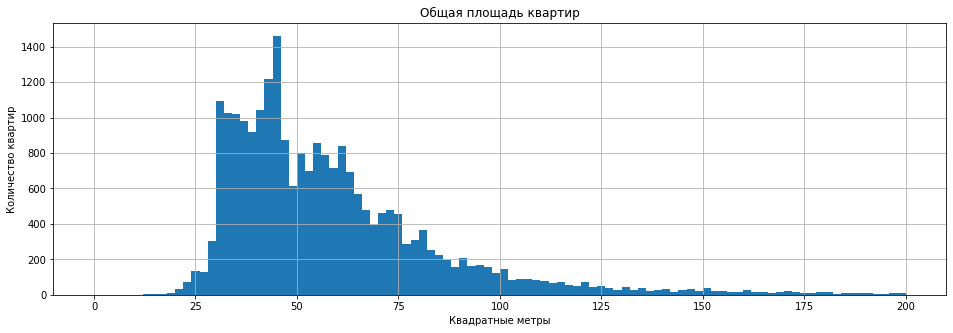

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
9826     494.1
22494    491.0
6621     488.0
660      483.9
6221     470.3
Name: total_area, dtype: float64

In [46]:
# построение гистограммы для столбца 'total_area' и 
# просмотр отсортированного списка

df.hist('total_area', bins = 100, range = (0,200), figsize = (16,5))
plt.title('Общая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
df['total_area'].sort_values(ascending = False).head(15)

По графику мы видим, что большинство квартир с площадью менее 100 квадратных метров. Самые часто встречающиеся это квартиры с площадью от 30 до 45 квадратных метров. 

Однако, стоит заметить, что есть квартиры с площадью более 200 квадратных метров.
По графику мы также видим, что количество квартир с площадями более 100 метров квадратных начинают убывать, тоже самое наблюдается с квартирами меньше 30 квадратных метров. Распределение на данном графике больше напоминает распределение Пуассона.

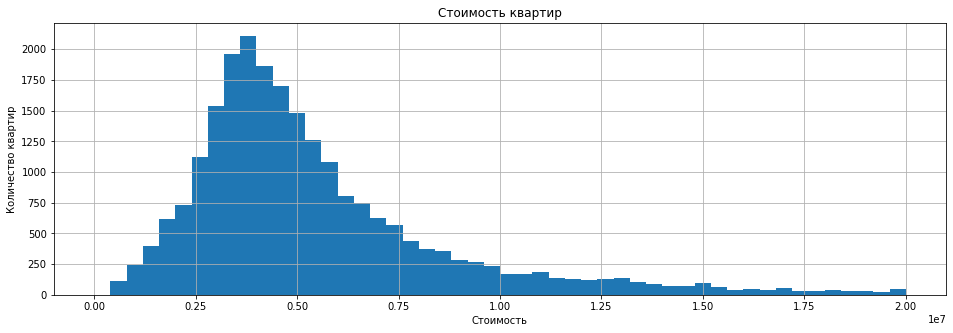

12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
19865    180000000
19155    160000000
2536     159984000
16495    159000000
1026     155000000
Name: last_price, dtype: int32

In [47]:
# построение гистограммы для столбца 'last_price' и 
# просмотр отсортированных значений

df.hist('last_price', bins = 50, range = (0,20000000), figsize = (16,5))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
df['last_price'].sort_values(ascending = False).head(15)

По графику мы видим, что цена большинства квартир начинается от 2 до 7 миллионов. Самый пик цены по квартирам это от 3.5 до 4 миллионов.

Также мы видим, что цены квартир после 7 миллионов и до 2 миллионов начинают убывать, это похоже на распределение Пуассона.

Стоит ещё заметить, что есть квартиры стоимостью в 763 миллиона, не совсем правдоподобная цена для квартиры.

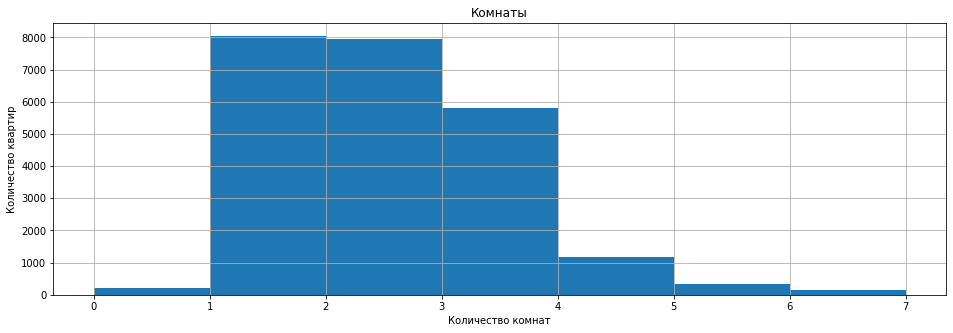

In [48]:
# построение гистограммы для столбца 'rooms'

df.hist('rooms', bins = 7, range = (0,7), figsize = (16,5))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

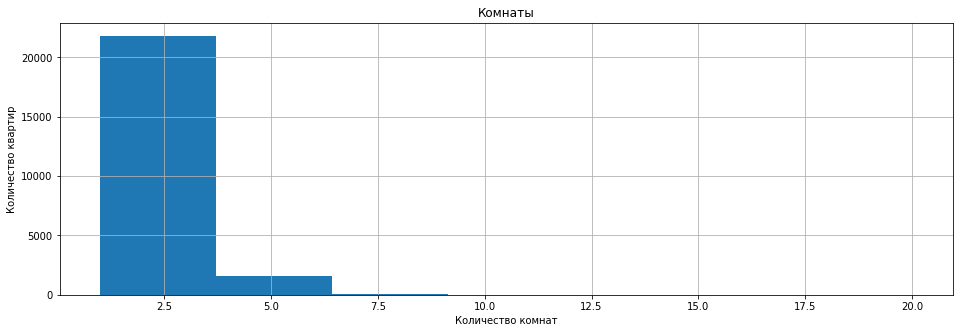

14498    19
18848    16
5358     15
20829    14
866      14
19540    12
9688     11
648      11
18119    10
4149     10
18891    10
13397     9
20791     9
9550      9
8822      9
Name: rooms, dtype: int64

In [49]:
# построение гистограммы для столбца 'rooms' и 
# просмотр отсортированных значений

df.hist('rooms', bins = 7, range = (1,20), figsize = (16,5))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
df['rooms'].sort_values(ascending = False).head(15)

По графику мы видим, что большинство квартир это однокомнатные и двухкомнатные, далее идут трёхкомнатные квартиры, их немного меньше. 

Четырёхкомнатных квартир совсем мало, чем больше количество комнат, тем меньше предложений. Распределение на данном графике похоже на распределение Пуассона.

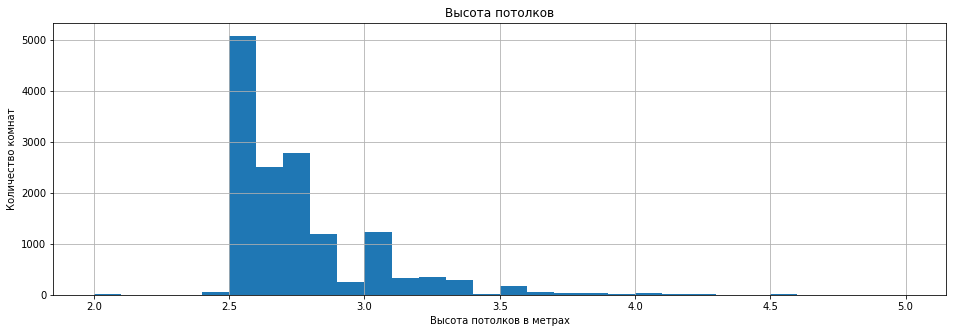

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
Name: ceiling_height, dtype: float64

In [50]:
# построение гистограммы для столбца 'ceiling_height' и 
# просмотр отсортированных значений

df.hist('ceiling_height', bins = 30, range = (2,5), figsize = (16,5))
plt.title('Высота потолков')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество комнат')
plt.show()
df['ceiling_height'].sort_values(ascending = False).head(15)

Каких то особых выбросов в столбце `ceiling_height` не наблюдается, поэтому заполним пропуски медианными значениями по всему датасету.

In [51]:
# заполнение пропущенных значений в столбце 'ceiling_height'

df['ceiling_height'] = df.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
print('Количество пропущенных значений:', df['ceiling_height'].isna().sum())

Количество пропущенных значений: 0


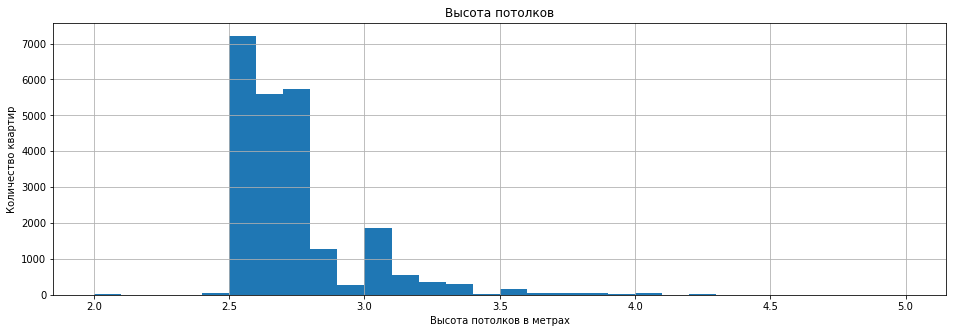

In [52]:
# построение гистограммы для столбца 'ceiling_height'

df.hist('ceiling_height', bins = 30, range = (2,5), figsize = (16,5))
plt.title('Высота потолков')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество квартир')
plt.show()

По гистограмме мы видим, что у большинства квартир высота потолков находится в диапазоне от 2.5 до 3.1 метра. 
Однако, по отсортированному списку мы видим, что есть высота потолков 100, 32, 27, 26 и 25 метров. Такая высота считается не совсем реальной, так как 27 метров это высота 9-ти этажного дома. 

### Изучение времени продажи квартиры

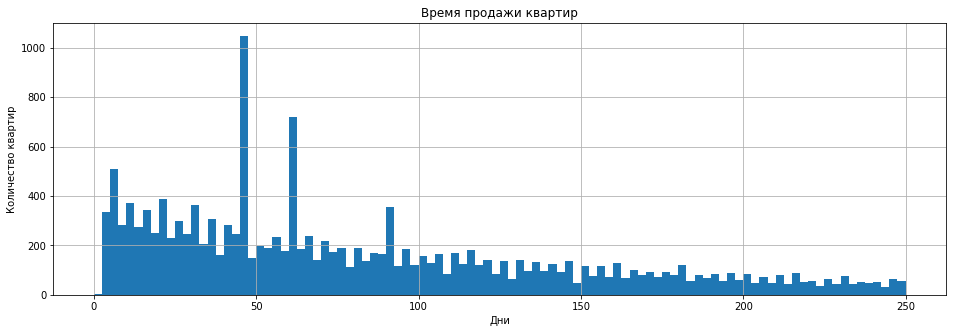

In [53]:
# построение гистограммы для столбца 'days_exposition'

df.hist('days_exposition', bins = 100, range = (0,250), figsize = (16,5))
plt.title('Время продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

In [54]:
print('Время продажи (медиана):', df['days_exposition'].median())
print('Время продажи (среднее):', df['days_exposition'].mean())

Время продажи (медиана): 95.0
Время продажи (среднее): 180.88863436982163


По графику мы видим, что квартиры, в основном, продаются в срок до 100 дней. Пик продажи квартир значится на отметке около 45 дней.

Быстрой продажей можно считать промежуток в 45 дней и меньше, а необычно долгой - промежуток от 220 дней и больше.

### Работа с редкими и выбивающимися значениями

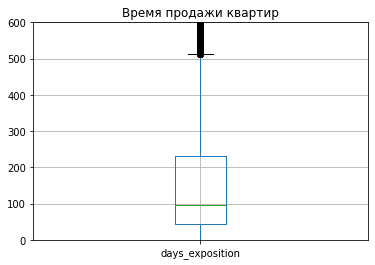

In [55]:
# построение диаграммы размаха для столбца 'days_exposition'

df.boxplot(column = 'days_exposition')
plt.ylim(0,600)
plt.title('Время продажи квартир')
plt.show()

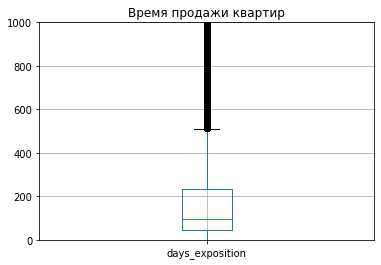

In [56]:
df.boxplot(column = 'days_exposition')
plt.ylim(0,1000)
plt.title('Время продажи квартир')
plt.show()

По графику мы видим, что среднее время продажи квартиры это 100 дней. Выбросами считаются значения больше 510 дней, поэтому удалим их.

In [57]:
# удаление выбивающихся значений в столбце 'days_exposition'

df = df.query('days_exposition < 510')
df.reset_index(drop = True)
df.query('days_exposition > 510')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_area_ratio,kitchen_area_ratio


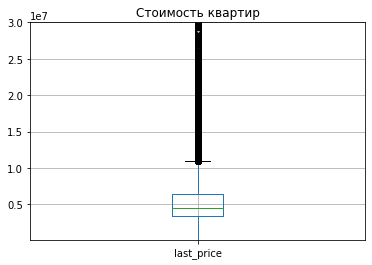

In [58]:
# построение диаграммы размаха для столбца 'last_price'

df.boxplot(column = 'last_price')
plt.ylim(100000,30000000)
plt.title('Стоимость квартир')
plt.show()

In [59]:
# просмотр остортированной таблицы

df.sort_values(by = 'last_price', ascending = True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_area_ratio,kitchen_area_ratio
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.000000,25,False,...,0,NaN,8.0,111,2,3,2019,последний,0.293578,0.371560
14911,5,430000,54.0,2018-06-26,2,2.65,3,30.832902,3,False,...,0,NaN,44.0,7962,1,6,2018,последний,0.570980,0.175146
16274,18,440000,40.0,2018-07-10,1,2.65,5,22.839187,1,False,...,0,NaN,45.0,11000,1,7,2018,первый,0.570980,0.175146
9581,7,450000,43.4,2018-08-31,2,2.65,5,30.300000,3,False,...,0,NaN,96.0,10368,4,8,2018,другой,0.698157,0.126728
17676,0,450000,36.5,2018-02-01,1,2.65,5,17.300000,4,False,...,0,NaN,120.0,12328,3,2,2018,другой,0.473973,0.232877
5698,7,450000,42.0,2017-07-31,2,2.65,1,23.000000,1,False,...,0,NaN,233.0,10714,0,7,2017,первый,0.547619,0.138095
16219,14,450000,38.5,2018-07-11,2,2.65,2,21.982717,1,False,...,0,NaN,45.0,11688,2,7,2018,первый,0.570980,0.175146
18867,1,470000,41.0,2018-02-11,1,2.65,5,32.000000,3,False,...,0,NaN,46.0,11463,6,2,2018,другой,0.780488,0.219512
23484,11,470000,44.5,2018-07-02,2,3.00,2,28.000000,2,False,...,0,NaN,298.0,10561,0,7,2018,последний,0.629213,0.168539
21912,0,470000,37.0,2018-02-18,1,2.60,3,21.126248,3,False,...,0,NaN,45.0,12702,6,2,2018,последний,0.570980,0.175146


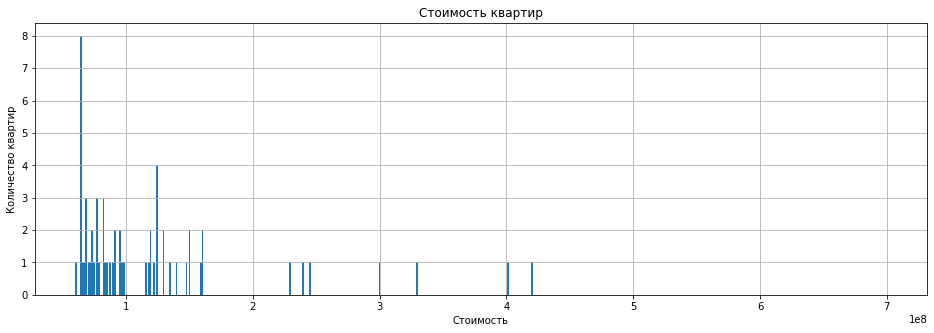

In [60]:
df.hist('last_price', range = (60000000, 700000000), figsize = (16,5), bins = 500)
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

На диаграмме размаха мы видим, что в выбросы попадают квартиры по стоимости выше 11 миллионов. Если посмотреть на гистограмму, то значений после 150 миллионов совсем немного. Стоит также отметить, что по рынку недвижимости стоимость квартиры до 150 миллионов вполне приемлема. 

Также, по отсортированной таблице мы видим, наименьшей стоимостью квартиры является 12190, что странно. 

Поэтому удалим значения меньше 2 миллионов и больше 150 миллионов, включая в выборку данные цифры.

In [61]:
# удаление выбивающихся значений в столбце 'last_price'

df = df.query(' 2000000 <= last_price <= 150000000')
df.reset_index(drop = True)
df.query('2000000 >= last_price >= 150000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_area_ratio,kitchen_area_ratio


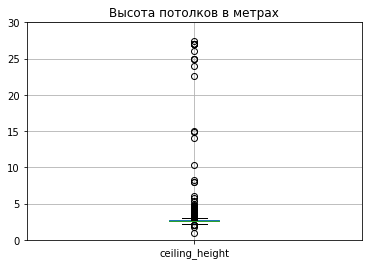

In [62]:
# построение диаграммы размаха для столбца 'ceiling_height'

df.boxplot(column = 'ceiling_height')
plt.ylim(0,30)
plt.title('Высота потолков в метрах')
plt.show()

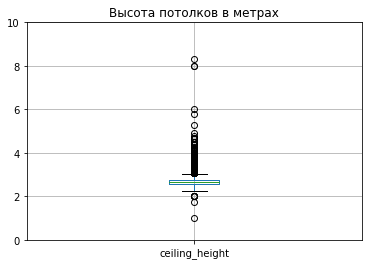

In [63]:
df.boxplot(column = 'ceiling_height')
plt.ylim(0,10)
plt.title('Высота потолков в метрах')
plt.show()

Как ранее мы уже упоминали, оптимальной высотой потолков считается 2,8 метров, все, что меньше это уже подвальные помещения. А самая максимальная высота потолков в старых домах это 4-4,5 метров. 

На диаграмме мы видим до первого квартиля выбросы в небольшом количестве, также, после третьего квартиля со значения 4,5-5 метров начинаются выбросы в небольшом количестве.

Поэтому, уберём значения меньше 2,3 и больше 4,6 метров.

In [64]:
# удаление выбивающихся значений в столбце 'ceiling_height'

df = df.query('2.3 < ceiling_height < 4.6')
df.reset_index(drop = True)
df.query('2.3 > ceiling_height > 4.6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_area_ratio,kitchen_area_ratio


### Определение факторов, влияющих на стоимость квартиры

Определим коэффициент корреляции и построим диаграмму рассеяния и столбчатую диаграмму для столбцов `total_area`, `rooms`, `citycenters_nearest`, `floor_group`, `weekday_exposition`, `month_exposition`, `year_exposition`.

In [65]:
# создание функции для определения коэффициента корреляции и
# построения диаграммы рассеяния

def corr1(column):
    print('Коэффициент корреляции цены от', column, df['last_price'].corr(df[column]))
    df.plot(x = column, y = 'last_price', kind = 'scatter', figsize = (14,7), alpha = 0.5, grid = True)
    plt.title(f'Зависимость стоимости квартиры от {column}')
    plt.show()

Коэффициент корреляции цены от total_area 0.7319597133396111


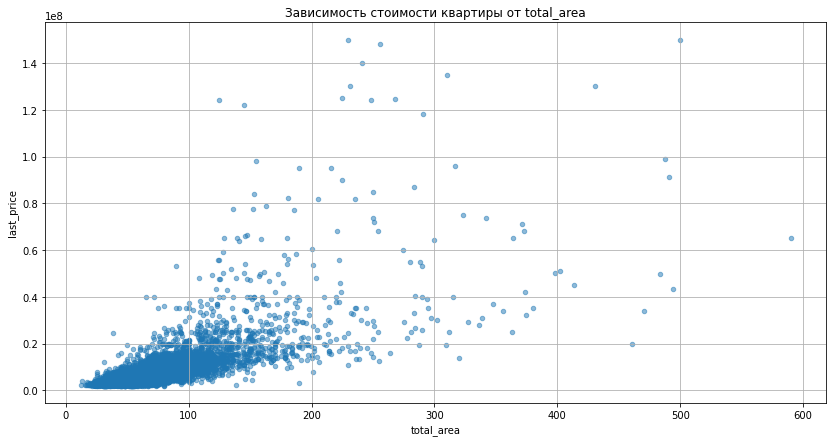

In [66]:
# определение коэффициента корреляции для столбца 'total_area' и 
# построения диаграммы рассеяния

corr1('total_area')

По графику мы видим, что зависимость цены от площади квартиры существует, но она не такая сильная.

При увеличении площади, возрастает и цена, только таких значений не так много.

Коэффициент корреляции цены от rooms 0.43767371340373934


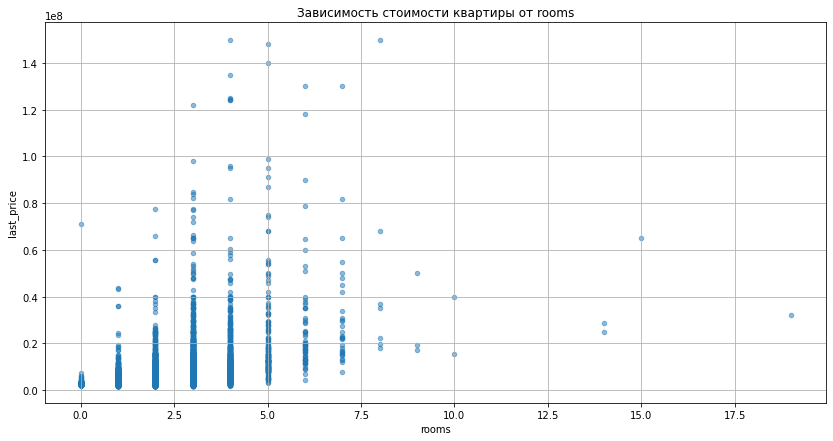

In [67]:
# определение коэффициента корреляции для столбца 'rooms' и
# построения диаграммы рассеяния

corr1('rooms')

По диаграмме рассеяния мы видим, что зависимость цены от количества комнат не такая уж сильная. Цена увеличивается до квартир с 3-мя комнатами, от 3-х до 7-ми комнат цена практически одинаковая.

Коэффициент корреляции цены от citycenters_nearest -0.2656178471550067


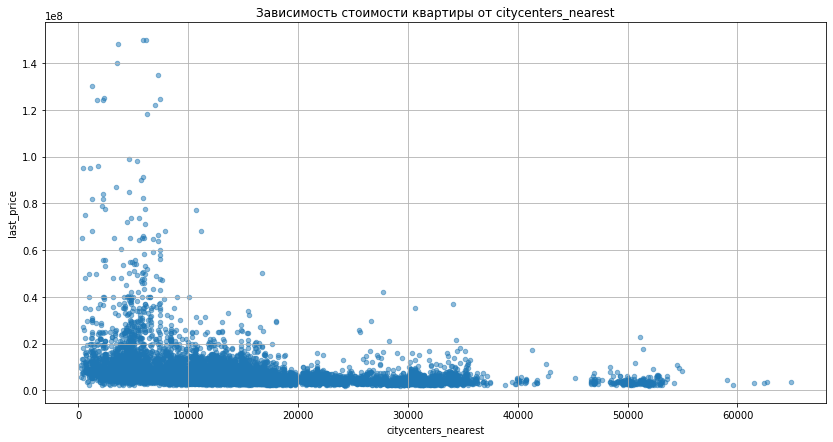

In [68]:
# определение коэффициента корреляции для столбца 'citycenters_nearest' и 
# построения диаграммы рассеяния

corr1('citycenters_nearest')

По графику мы видим, что зависимость цены от расстояния до центра не сильная. Стоит заметить, от 4000 до 8000 киллометров заметен определенный подъём цены на квартиры, возможно, что там находится какой то крупный населённый пункт (регион/область).

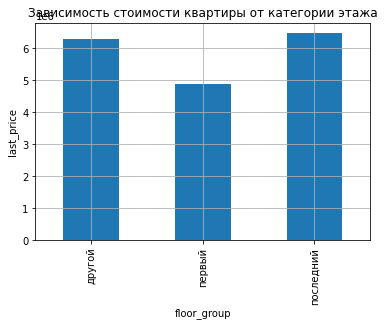

In [69]:
# определение средней цены в каждой категории и 
# построение столбчатой диаграммы

df.groupby('floor_group')['last_price'].mean().plot(x = 'floor_group', y = 'last_price', kind = 'bar', grid = True)
plt.title('Зависимость стоимости квартиры от категории этажа')
plt.ylabel('last_price')
plt.show()

По графику мы видим, что больше всех цена на квартиры на последнем этаже, сразу после идёт категория 'другой' (это не первый и не последний этаж) и последнее место занимают квартиры на первом этаже, на них цена ниже, чем на квартиры на других этажах.

Коэффициент корреляции цены от weekday_exposition 0.007556175973380824


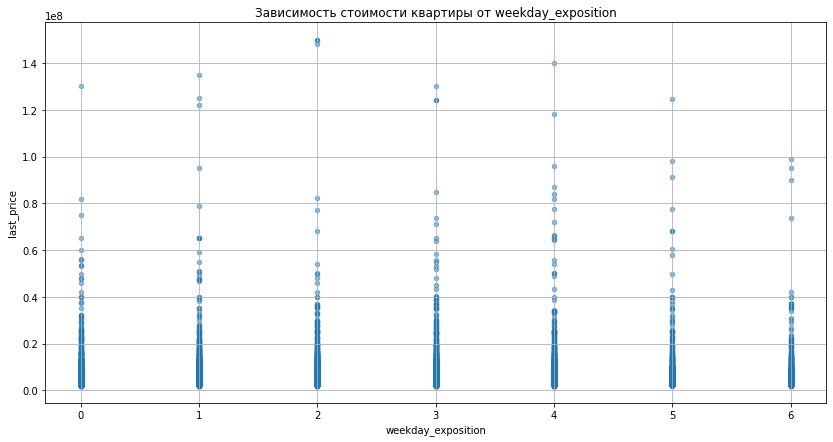

Коэффициент корреляции цены от month_exposition 0.0019196522477751847


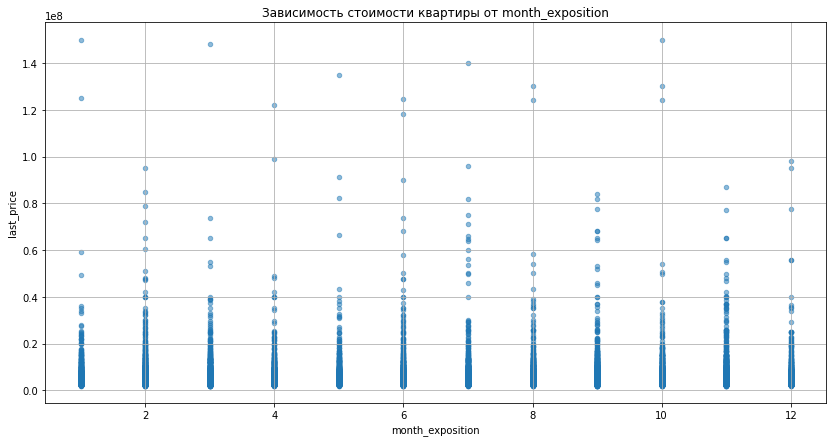

Коэффициент корреляции цены от year_exposition -0.047389677931701096


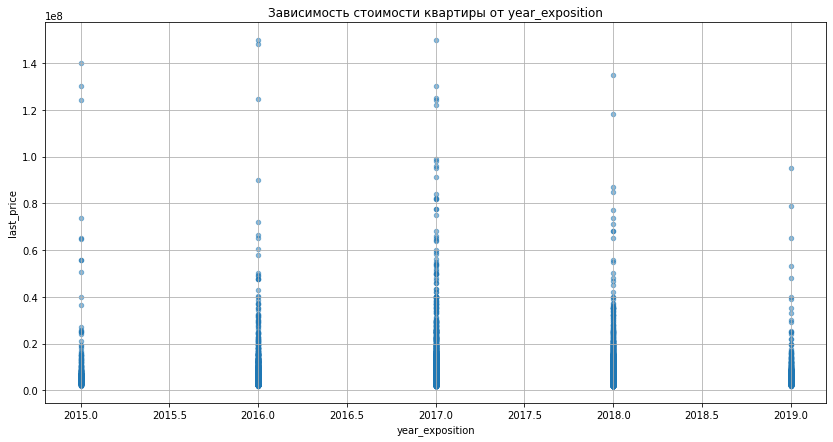

In [70]:
## определение коэффициента корреляции для столбца 'weekday_exposition',
# 'month_exposition','year_exposition' и 
# построения диаграммы рассеяния

corr1('weekday_exposition')
corr1('month_exposition')
corr1('year_exposition')

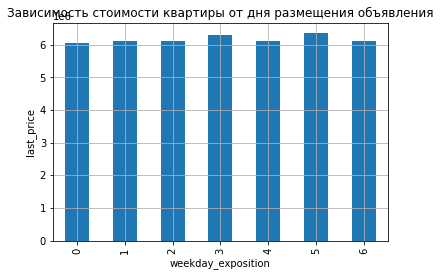

In [71]:
# построение столбчатой диаграммы для столбца 'weekday_exposition'

df.groupby('weekday_exposition')['last_price'].mean().plot(x = 'weekday_exposition', y = 'last_price', kind = 'bar', grid = True)
plt.title('Зависимость стоимости квартиры от дня размещения объявления')
plt.ylabel('last_price')
plt.show()

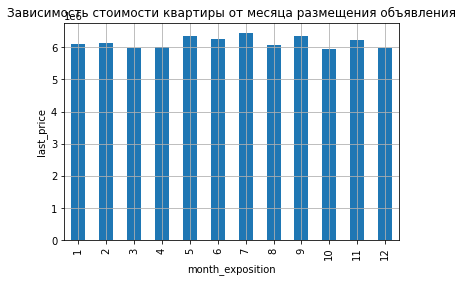

In [72]:
# построение столбчатой диаграммы для столбца 'month_exposition'

df.groupby('month_exposition')['last_price'].mean().plot(x = 'month_exposition', y = 'last_price', kind = 'bar', grid = True)
plt.title('Зависимость стоимости квартиры от месяца размещения объявления')
plt.ylabel('last_price')
plt.show()

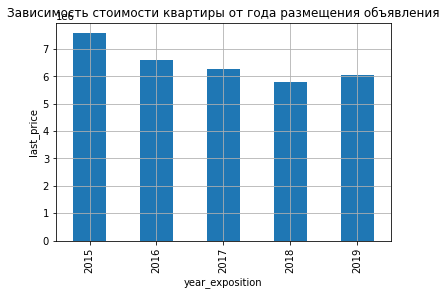

In [73]:
# построение столбчатой диаграммы для столбца 'year_exposition'

df.groupby('year_exposition')['last_price'].mean().plot(x = 'year_exposition', y = 'last_price', kind = 'bar', grid = True)
plt.title('Зависимость стоимости квартиры от года размещения объявления')
plt.ylabel('last_price')
plt.show()

По графикам мы видим, что цена не сильно зависит от дня недели, месяца и года. 

Дороже всего квартиры, опубликованные в субботу и четверг, но разница с другими днями недели не сильно высокая.

В июле стоимость жилья дороже, далее идёт май и сентябрь.

В 2015 году стоимость жилья была выше всего по сравнению с другими годами.


### Сравнение средней цены квадратного метра в топ-10 городов

In [74]:
# сравнение средней цены квадратного метра в топ-10 городов

city_ten = df['locality_name'].value_counts().head(10)
city_ten_sm_price = (
    df
    .query('locality_name in @city_ten.index')
    .pivot_table(index = 'locality_name' , values = 'price_per_square_meter')
    .sort_values(by = 'price_per_square_meter', ascending = False)
    .astype('int')
)
city_ten_sm_price

,price_per_square_meter
locality_name,
Санкт-Петербург,110983
Пушкин,102031
деревня Кудрово,92680
посёлок Парголово,89493
посёлок Мурино,86270
посёлок Шушары,77974
Колпино,74748
Гатчина,69593
Всеволожск,69408


Самая высокая стоимость жилья наблюдается в Санкт-Петербурге - 110983 за квадратный метр, а самая низкая в Выборге, там 58603 за квадратный метр.

### Определение границы центральной зоны

In [75]:
# создание столбца с расстоянием до цента в км,
# замена пропусков и
# перевод значений в тип данных 'int'

df['citycenters_nearest_km'] = df['citycenters_nearest'] / 1000
df['citycenters_nearest_km'] = df['citycenters_nearest_km'].fillna(0).astype('int')

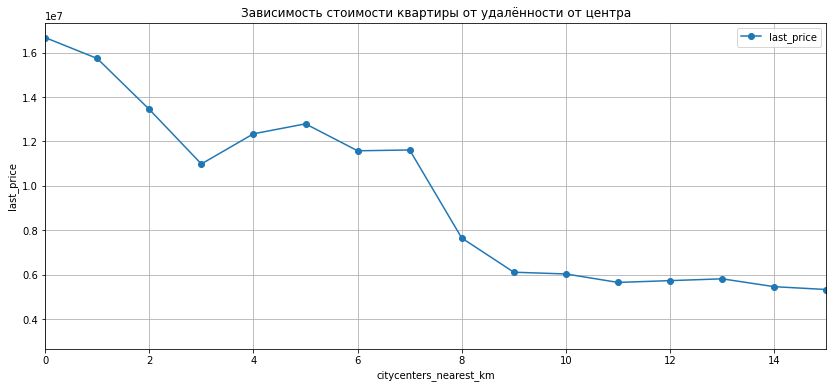

In [76]:
# подсчёт средней цены для каждого километра и 
# построение графика

(
df.query('locality_name == "Санкт-Петербург"')
.pivot_table(index = 'citycenters_nearest_km', values = 'last_price')
.plot(style = 'o-', grid = True, figsize = (14,6), xlim = (0,15))
)
plt.title('Зависимость стоимости квартиры от удалённости от центра')
plt.ylabel('last_price')
plt.show()

По графику мы видим что линия сильно меняется на значении `7`, далее график идёт на убыль. 

Следовательно, центральная зона это 7 километров и меньше.

### Анализ сегмента квартир в центре, сравнение с квартирами по всему городу

In [77]:
# выделение сегмента квартир в центре 

print('Сегмент квартир в центре:')
spb_center = df.query('(locality_name == "Санкт-Петербург") & (citycenters_nearest_km <= 7)')
spb_center.head()

Сегмент квартир в центре:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_area_ratio,kitchen_area_ratio,citycenters_nearest_km
3,0,64900000,159.0,2015-07-24,3,2.6,14,90.785766,9,False,...,234.0,424.0,408176,4,7,2015,другой,0.570980,0.175146,6
24,8,6500000,97.2,2015-10-31,2,3.0,3,46.500000,1,False,...,124.0,265.0,66872,5,10,2015,первый,0.478395,0.201646,2
63,2,20000000,118.0,2018-09-11,3,3.0,9,68.000000,7,False,...,779.0,37.0,169491,1,9,2018,другой,0.576271,0.135593,4
94,3,3500000,29.5,2019-04-26,1,2.5,5,15.600000,2,False,...,NaN,4.0,118644,4,4,2019,другой,0.528814,0.186441,7
99,32,9600000,90.0,2017-09-26,4,2.6,5,67.000000,2,False,...,NaN,104.0,106666,1,9,2017,другой,0.744444,0.088889,2


In [78]:
# выделение квартир по всему городу

print('Квартиры по всему Санкт-Петербургу:')
spb_all = df.query('locality_name == "Санкт-Петербург"')
spb_all.head()

Квартиры по всему Санкт-Петербургу:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_area_ratio,kitchen_area_ratio,citycenters_nearest_km
3,0,64900000,159.0,2015-07-24,3,2.60,14,90.785766,9,False,...,234.0,424.0,408176,4,7,2015,другой,0.570980,0.175146,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,8
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557,15
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.300000,3,False,...,553.0,137.0,127525,3,11,2017,другой,0.512626,0.214646,13
15,16,4650000,39.0,2017-11-18,1,2.60,14,20.500000,5,False,...,296.0,19.0,119230,5,11,2017,другой,0.525641,0.194872,14


Изучим отдельно в центре Санкт-Петербурга и по всему городу следующие параметры: площадь, цена, число комнат, высота потолков.

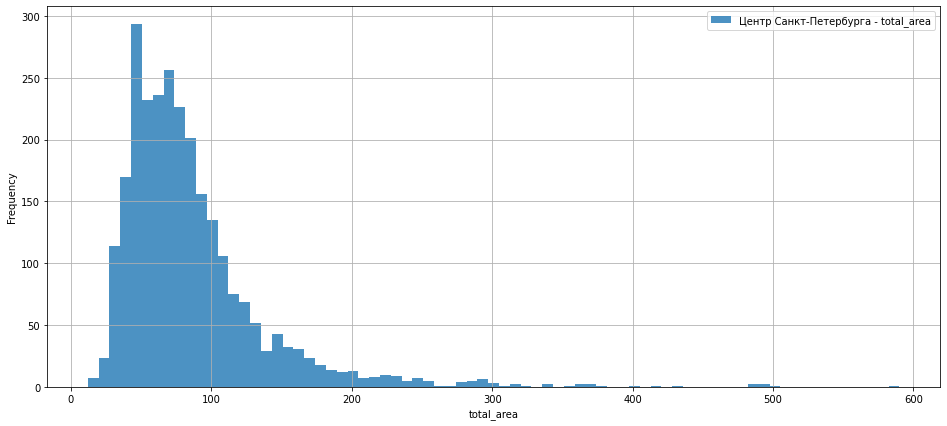

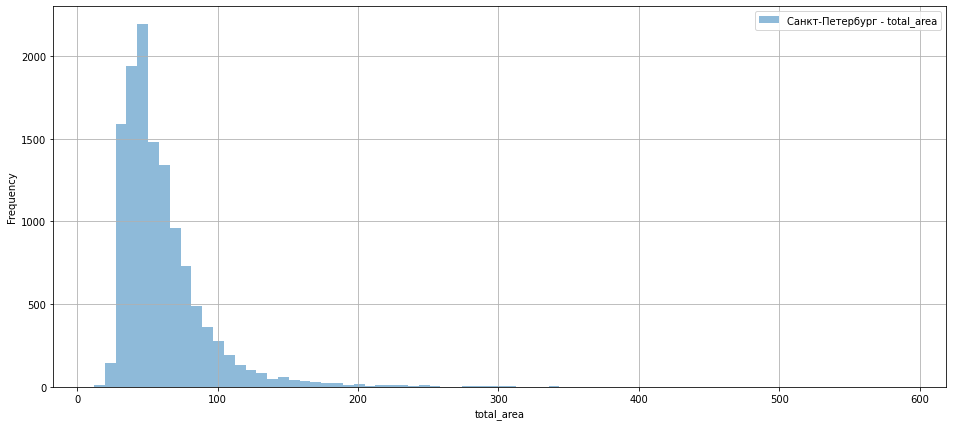

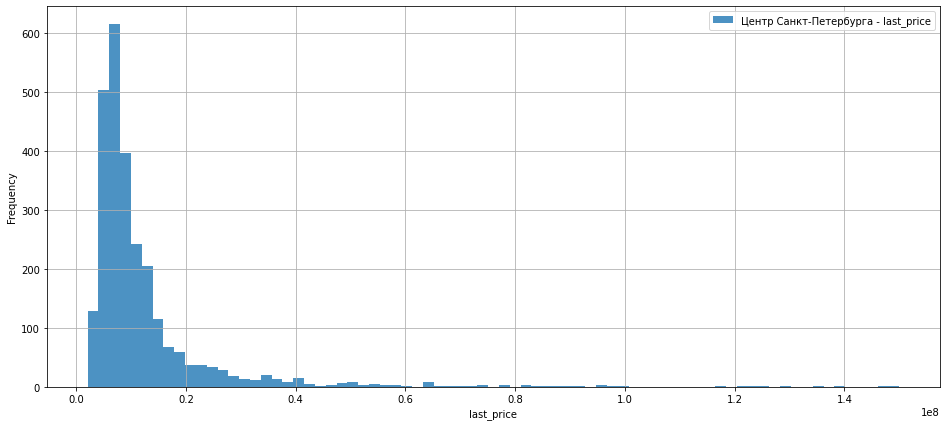

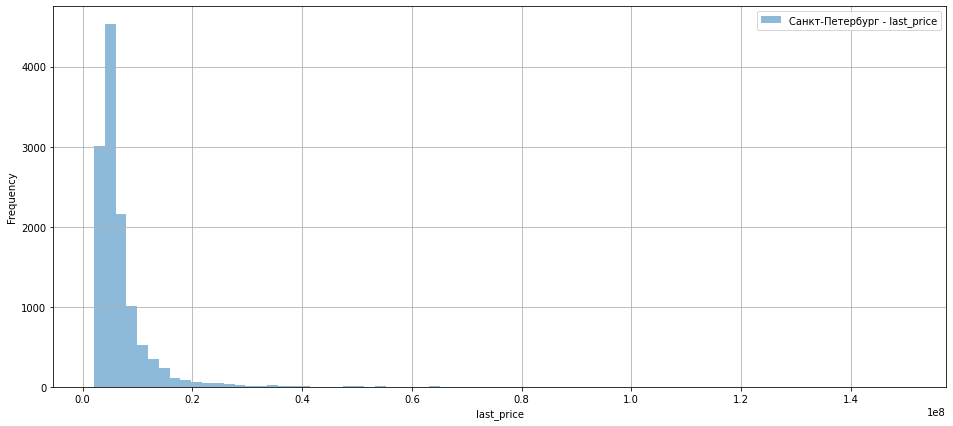

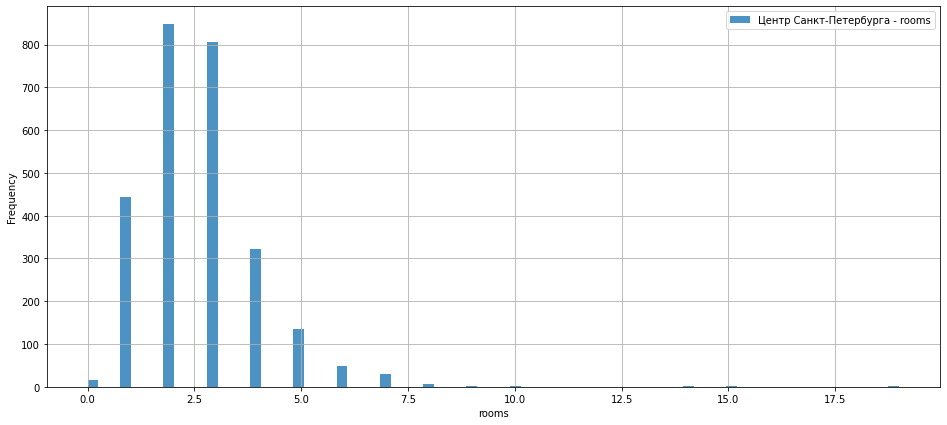

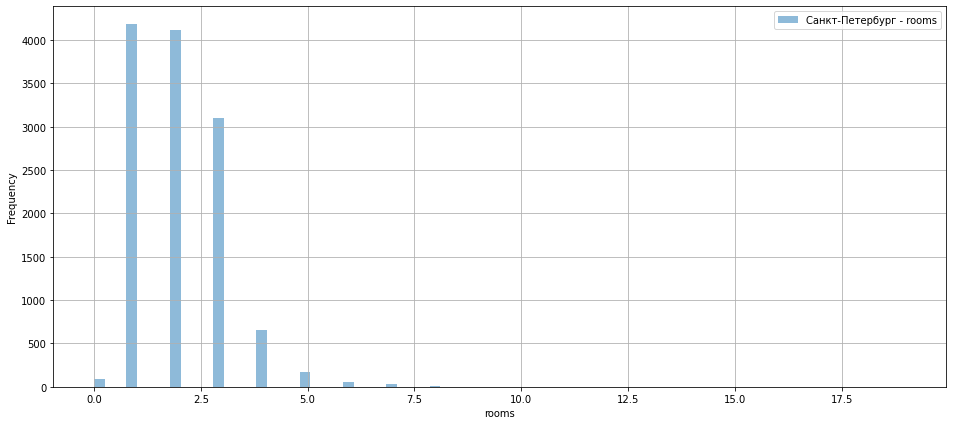

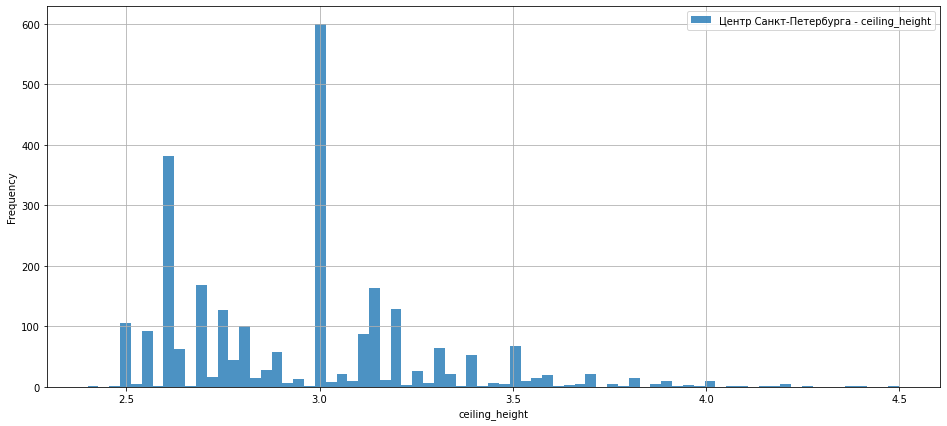

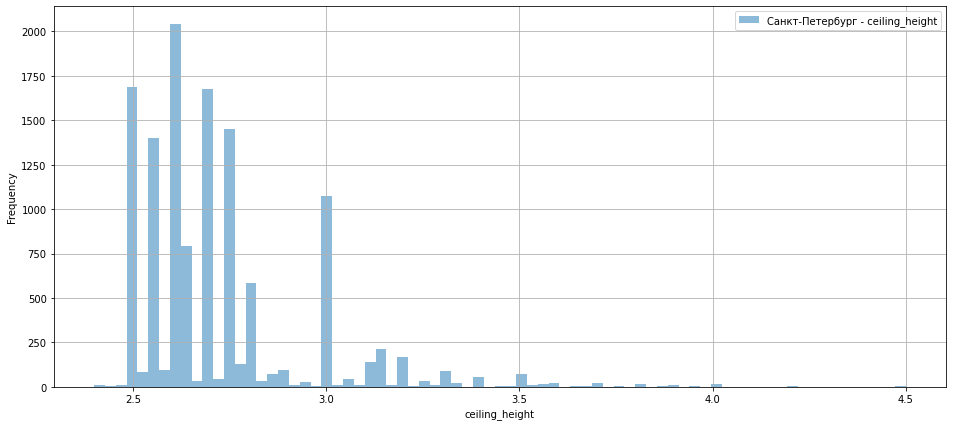

In [79]:
# изучение параметров в центре Санкт-Петербурга и 
# по всему городу

for col in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    spb_center.plot(
    y = col, kind = 'hist', figsize = (16,7), bins = 75, grid = True, alpha = 0.8, 
    legend = True, label = 'Центр Санкт-Петербурга - ' + col)
    plt.xlabel(col)
    spb_all.plot(
    y = col, kind = 'hist', figsize = (16,7), bins = 75, grid = True, alpha = 0.5,
    legend = True, label = 'Санкт-Петербург - ' + col)
    plt.xlabel(col)
plt.show()

По графикам мы видим, что:
    
- Процентр квартир с большей площадью в центре выше, чем по всему городу. Также, можно заметить, что в центре большое количество квартир с площадью 100 квадратных метров и выше;

- Стоимость квартир в центре Санкт-Петербурга также выше, вплоть до 14 миллионов и дальше;

- Самыми популярными квартирами в центре Санкт-Петербурга считаются 2-х комнатные и 3-х комнатные, а по городу большей популярностью пользуются однокомнатные и 2-х комнатные;

- Высота потолков в центре города выше, самое часто встречающееся - 3 метра, а по городу где то около 2.6 метров.

Далее выделим факторы, влияющие на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления, и сравним показатели между целым городом и центром .

Коэффициент корреляции цены в центре Санкт-Петербурга от rooms 0.4026915598928764


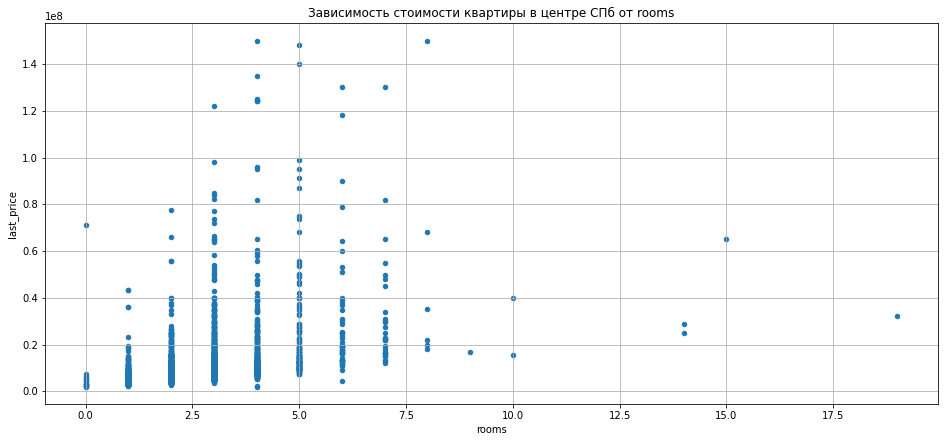

Коэффициент корреляции цены в Санкт-Петербурге от rooms 0.4522805960369822


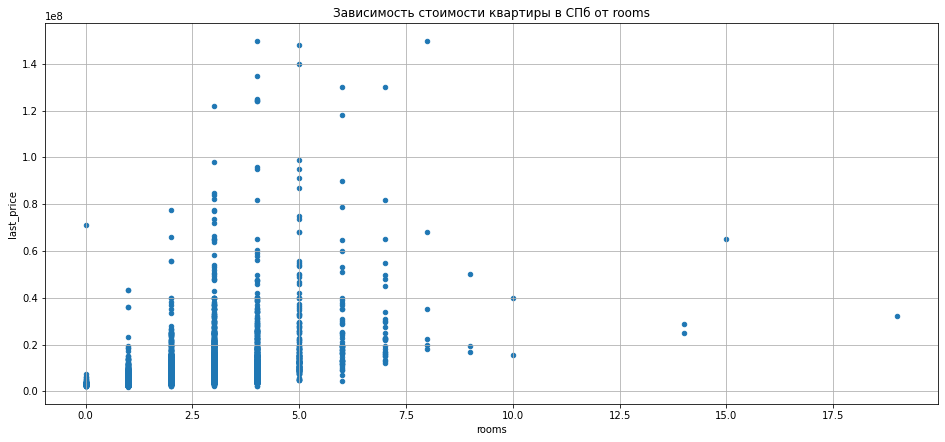

Коэффициент корреляции цены в центре Санкт-Петербурга от floor 0.10194309877742848


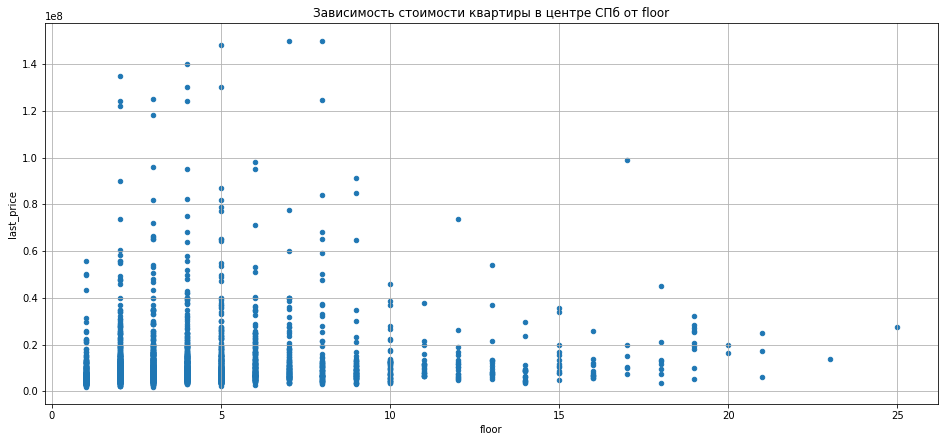

Коэффициент корреляции цены в Санкт-Петербурге от floor -0.007498849853271944


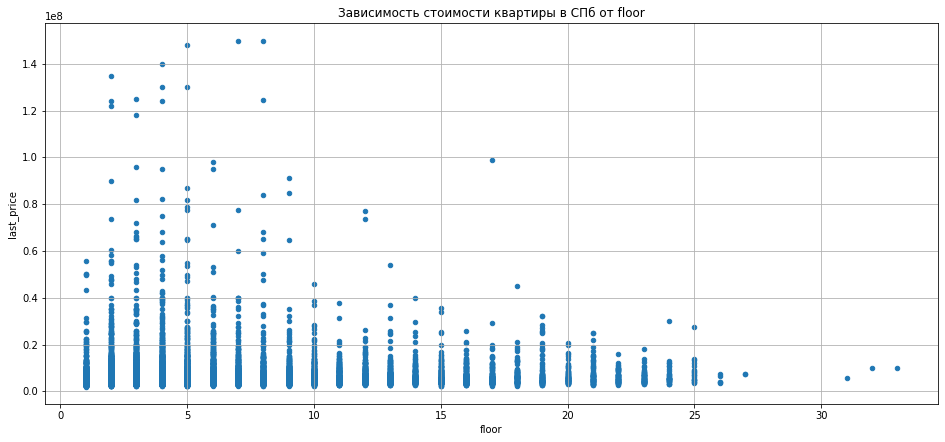

Коэффициент корреляции цены в центре Санкт-Петербурга от citycenters_nearest -0.05727333147732854


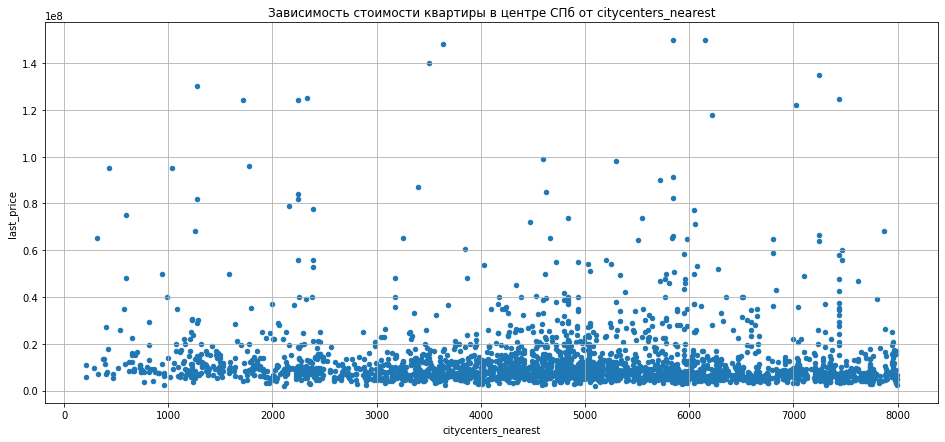

Коэффициент корреляции цены в Санкт-Петербурге от citycenters_nearest -0.329928544870218


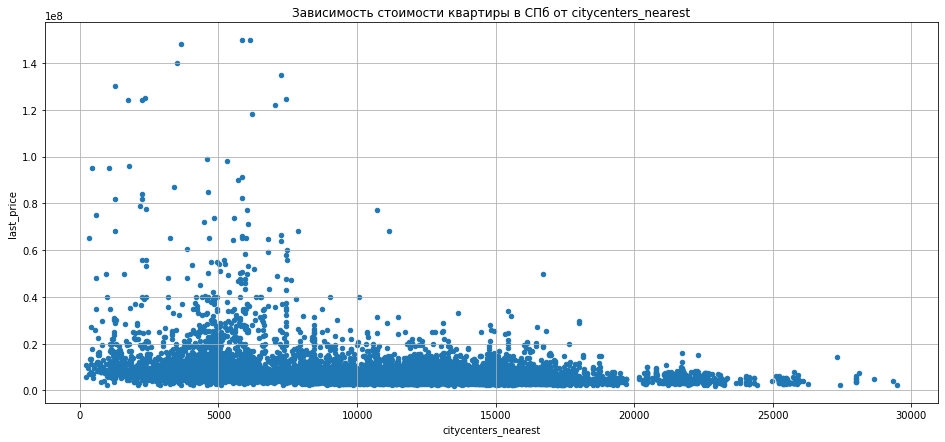

Коэффициент корреляции цены в центре Санкт-Петербурга от weekday_exposition 0.019389403237274675


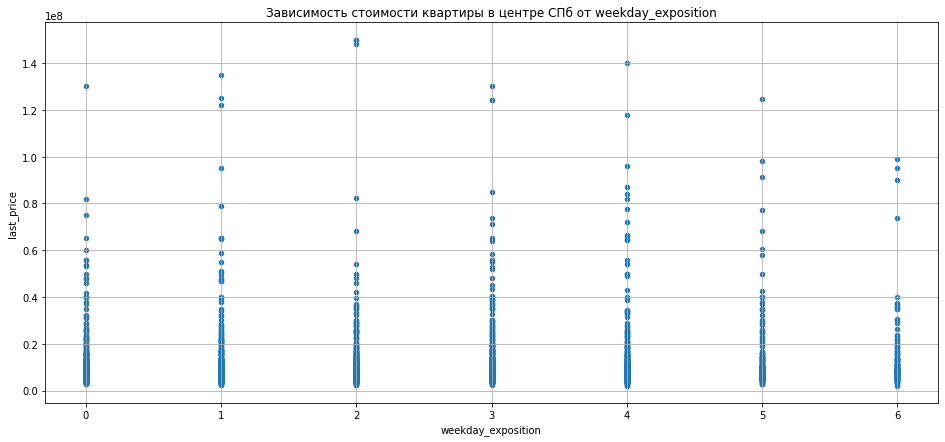

Коэффициент корреляции цены в Санкт-Петербурге от weekday_exposition 0.009638457839104702


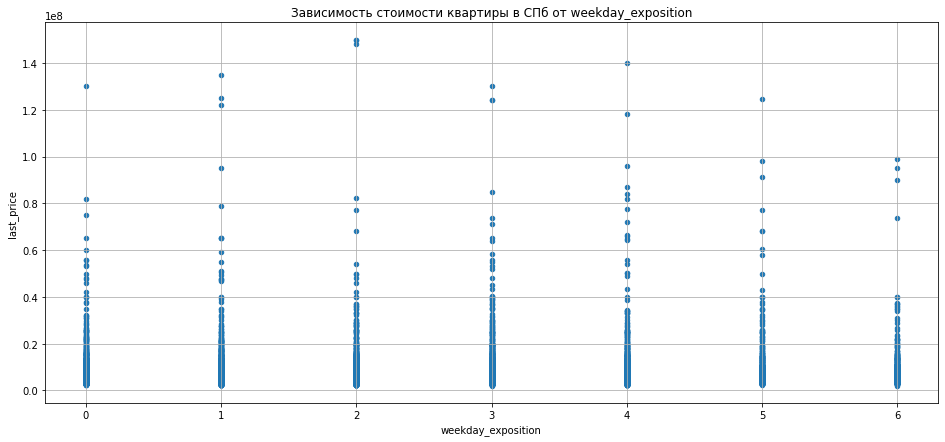

Коэффициент корреляции цены в центре Санкт-Петербурга от month_exposition -0.010239739204473205


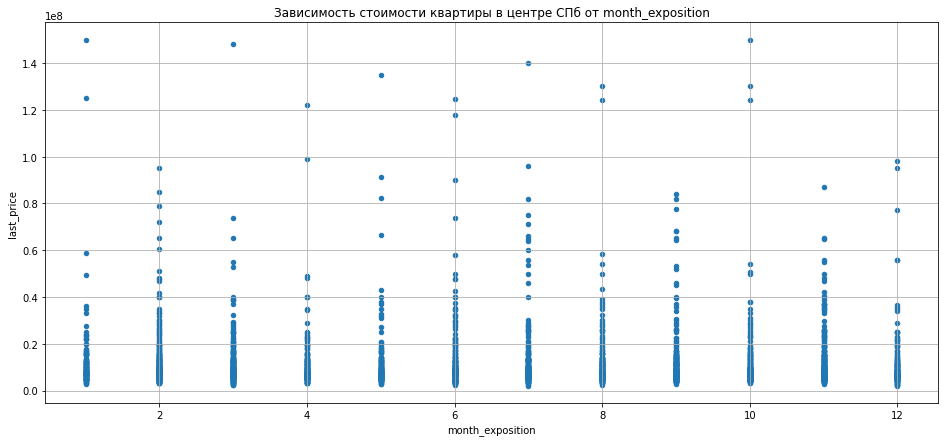

Коэффициент корреляции цены в Санкт-Петербурге от month_exposition -0.0014712490266169586


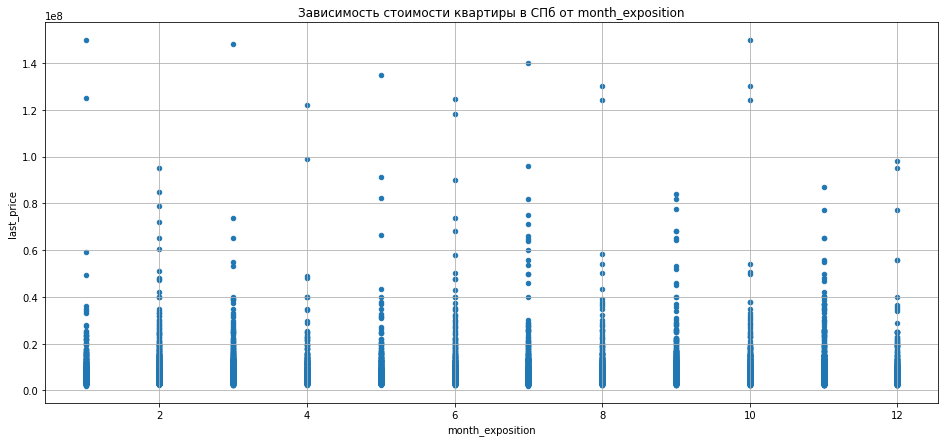

Коэффициент корреляции цены в центре Санкт-Петербурга от year_exposition -0.0855208311295651


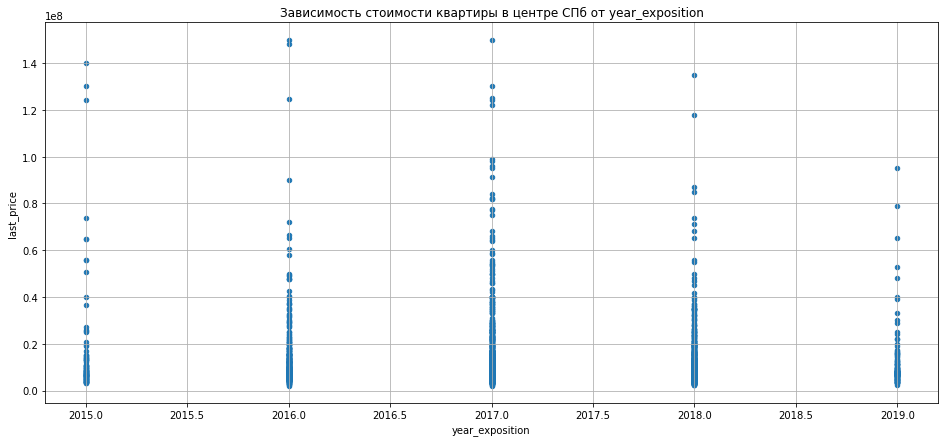

Коэффициент корреляции цены в Санкт-Петербурге от year_exposition -0.0509633004769467


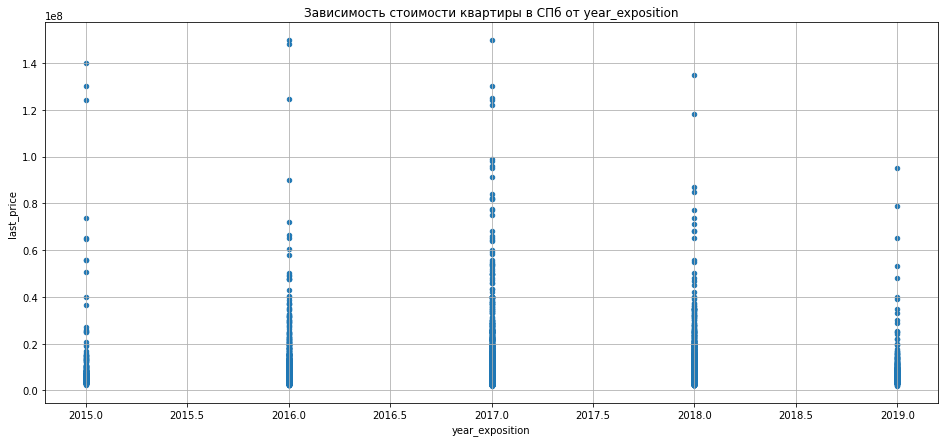

In [80]:
# создание функции для определения
# коэффициента корреляции и построения диаграммы рассеяния

def corr_spb(column):
    
    print('Коэффициент корреляции цены в центре Санкт-Петербурга от', column, spb_center['last_price'].corr(spb_center[column]))
    spb_center.plot(x = column, y = 'last_price', kind = 'scatter', figsize = (16,7), grid = True)
    plt.title(f'Зависимость стоимости квартиры в центре СПб от {column}')
    plt.show()
    
    print('Коэффициент корреляции цены в Санкт-Петербурге от', column, spb_all['last_price'].corr(spb_all[column]))
    spb_all.plot(x = column, y = 'last_price', kind = 'scatter', figsize = (16,7), grid = True)
    plt.title(f'Зависимость стоимости квартиры в СПб от {column}')
    plt.show()
   
    
for col in ['rooms', 'floor', 'citycenters_nearest', 'weekday_exposition', 'month_exposition', 'year_exposition']:
    corr_spb(col)

Согласно графикам мы видим, что:

- Зависимость цены квартиры от количества комнат не очень сильная, как в центре, так и во всём городе. Однако, в центре зависимость ещё менее выражена;

- Зависимость цены квартиры от этажа не прослеживается, как в центре, так и в городе;

- Зависимость цены квартиры от расстояния до центра в городе более заметна, но тоже не такая сильная;

- Зависимость цены квартиры от даты размещения объявления не прослеживается совсем.

Теперь посмотрим, есть ли зависимость стоимости квартиры от категории этажа (первый, последний, другой).

Центр Санкт-Петербурга:


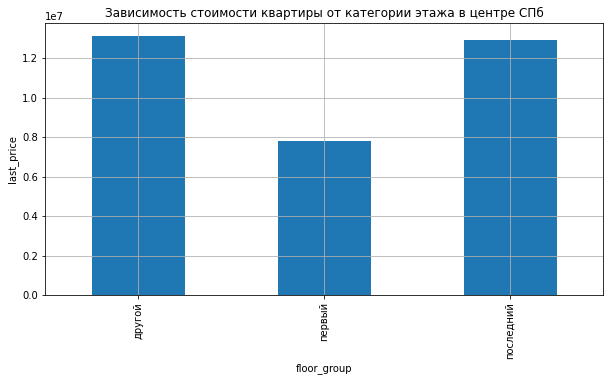

Санкт-Петербург:


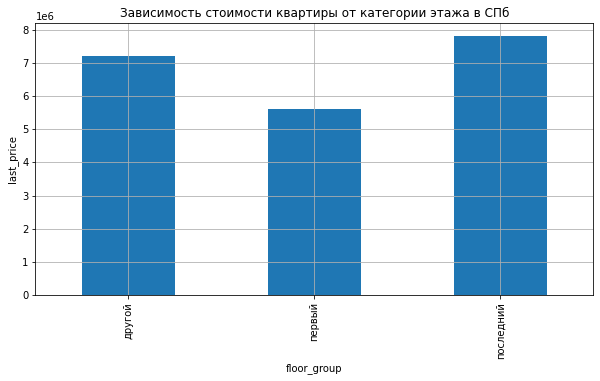

In [81]:
# расчёт средней цены в каждой категории и 
# построение столбчатой диаграммы


print('Центр Санкт-Петербурга:')
(
    spb_center
    .groupby('floor_group')['last_price'].mean()
    .plot(x = 'floor_group', y = 'last_price', kind = 'bar', figsize = (10,5), grid = True)
)
plt.title('Зависимость стоимости квартиры от категории этажа в центре СПб')
plt.ylabel('last_price')
plt.show()

print('Санкт-Петербург:')
(
    spb_all
    .groupby('floor_group')['last_price'].mean()
    .plot(x = 'floor_group', y = 'last_price', kind = 'bar', figsize = (10,5), grid = True)
)
plt.title('Зависимость стоимости квартиры от категории этажа в СПб')
plt.ylabel('last_price')
plt.show()

По графику стоит отметить, что в центре Санкт-Петербурга квартиры на последнем этаже и других этажах, кроме первого, стоят практически одинаково. Во всём городе наоборот, квартиры на последнем этаже самые дорогие.

## Общий вывод

В процессе исследования для начала мы провели предобработку данных:

* заменили пропущенные значения в столбцах `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `parks_around3000`, `ponds_around3000` и `ceiling_height`;
* перевели значения к типу `int` в столбцах `last_price`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`;
* изменили в столбце `first_day_exposition` тип данных на `datetime`, но оставили только дату, так как время не указано.
* изменили тип данных в столбце `is_apartment` на `bool`;
* изменили название столбца `citiCenters_nearest` на `citicenters_nearest`;
* убрали неявные дубликаты в столбце `locality_name`(слово `поселок` заменили на `посёлок`, а словосочетание `городской посёлок` на `посёлок городского типа`).

Далее сделали необходимы расчёты и добавили столбцы с новой информацией о продаваемых квартирах, а именно:

- столбец `price_per_square_meter`, где указана цена за квадратный метр;
- столбцы `weekday_exposition` (день публикации объявления), `month_exposition` (месяц публикации объявления) и `year_exposition` (год публикации объявления);
- столбец `floor_group`, где указана классификация этажей (первый, последний, другой);
- столбцы `living_area_ratio` (соотношение жилой площади к общей) и `kitchen_area_ratio` (соотношение площади кухни к общей площади квартиры).

Следующим шагом был исследовательский анализ данных, в котором мы выявили:

* Квартиры, в основном, продаются в срок до 100 дней. Пик продажи квартир значится на отметке около 45 дней. Быстрой продажей можно считать промежуток в 45 дней и меньше, а необычно долгой - промежуток от 220 дней и больше;

* Площадь квартиры больше влияет на стоимость, чем количество комнат;

* Больше  всех цена на квартиры на последнем этаже, сразу после идёт категория 'другой' (это не первый и не последний этаж) и последнее место занимают квартиры на первом этаже, на них цена ниже, чем на квартиры на других этажах;

* Самая высокая стоимость жилья в топ-10 городов наблюдается в Санкт-Петербурге - 110983 за квадратный метр, а самая низкая в Выборге, там 58603 за квадратный метр;

* Процентр квартир с большей площадью в центре выше, чем по всему городу. Также, можно заметить, что в центре большое количество квартир с площадью 100 квадратных метров и выше;

* Стоимость квартир в центре Санкт-Петербурга также выше, вплоть до 14 миллионов и дальше;

* Самыми популярными квартирами в центре Санкт-Петербурга считаются 2-х комнатные и 3-х комнатные;

* Высота потолков в центре города выше, самое часто встречающееся - 3 метра;

* В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.

